# GWAS Tutorial

This tutorial is originally available at: https://github.com/hailianghuang/gwas-tutorial

- contact: Hailiang Huang (hhuang@broadinstitute.org)

The tutorial requires [PLINK2](https://www.cog-genomics.org/plink2), [R](https://www.r-project.org) and the `qqman` package in R.

## Data inspection

In [1]:
head gwas_example.ped | cut -c 1-100 
head gwas_example.map

NA20505 NA20505 0 0 2 1 0 0 A A A C T T G G C T T T T T A A G G C C A A C C A A G G T T C C G G G G 
NA20504 NA20504 0 0 2 2 G G A A C C T T G G T T T T T T A A G G C C A A C C A A G G T T 0 0 G G G G 
NA20506 NA20506 0 0 2 2 G G A A A C T T G G T T T T C T A A A G C C C A C C A A A G T T C C G G G G 
NA20502 NA20502 0 0 2 1 G G A A C C T T G G T T T T C T A A A G C C C A C C A A A G T T T C G G G G 
NA20528 NA20528 0 0 1 2 G G A A C C G T G G C T G T C C G A A G C C C C C C A A A G T T C C G G G G 
NA20531 NA20531 0 0 2 1 G G A A A C G T G G C T T T C T G A G G C C C A T C A A G G T T C C G G G G 
NA20534 NA20534 0 0 1 1 C G G A C C G G G G C T G G C C G A A G C C C C C C A A G G T T C C G G A G 
NA20535 NA20535 0 0 2 1 G G A A A C G T G G C C T T C C G A A G C C C C C C C A A G T T C C G G G G 
NA20586 NA20586 0 0 1 2 G G A A A C G T G G T T G T C T A A A G C C C A T C C A A G T T C C G G G G 
NA20756 NA20756 0 0 2 1 G G A A A C G G G G C C T T C C G G G G C C A A C C A A G G C T T C

## Convert to binary files

In [2]:
plink --file gwas_example --make-bed --out gwas_example
ls -l 
head gwas_example.bim 
head gwas_example.fam

ls -rlth gwas_example.bed
ls -rlth gwas_example.ped

PLINK v1.90p 64-bit (11 Dec 2023)              www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example.log.
Options in effect:
  --file gwas_example
  --make-bed
  --out gwas_example

32768 MB RAM detected; reserving 16384 MB for main workspace.
.ped scan complete (for binary autoconversion).61617171818191920202121222223232424252526262727282829293030313132323333343435353636373738383939404041414242434344444545464647474848494950505151525253535454555556565757585859596060616162626363646465656666676768686969707071717272737374747575767677777878797980808181828283838484858586868787888889899090919192929393949495959696979798989999100%
Performing single-pass .bed write (100310 variants, 200 people).
--file: gwas_example-temporary.bed + gwas_example-temporary.bim +243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394%
gwas_example-temporary.fam written.
100310 variants

## Calculate missing rate

In [3]:
plink2 --bfile gwas_example --missing --out gwas_example
head gwas_example.imiss
awk '$6 > 0.02' gwas_example.imiss

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example.log.
Options in effect:
  --bfile gwas_example
  --missing
  --out gwas_example

Start time: Mon Jun  3 09:04:23 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
200 samples (99 females, 101 males; 200 founders) loaded from gwas_example.fam.
100310 variants loaded from gwas_example.bim.
1 binary phenotype loaded (39 cases, 161 controls).
Calculating sample missingness rates... 65done.
Calculating allele frequencies... 65done.
--missing: Sample missing data report written to gwas_example.smiss .
--missing: Variant missing data report written to gwas_example.vmiss .2122222323242425252626272728282930303131323233333434353536363737383839404041414242434344444545464647474848495050515152525353545455555656575758585960606161626263636464656566666

## Calculate heterozygosity rate

In [4]:
plink --bfile gwas_example --het --out gwas_example
head gwas_example.het

PLINK v1.90p 64-bit (11 Dec 2023)              www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example.log.
Options in effect:
  --bfile gwas_example
  --het
  --out gwas_example

32768 MB RAM detected; reserving 16384 MB for main workspace.
100310 variants loaded from .bim file.
200 people (101 males, 99 females) loaded from .fam.
200 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 200 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996374.
100310 variants and 200 people pass filters and QC.
Among remaining phenotypes, 39 are cases and 161 are controls.
--het: 100310 variants scanned, report written to gwa

## Generate a list of IDs failing the missing rate and heterozygosity test

Call the R code,

In [5]:
Rscript gwas_remove_imiss_het.R

[1] "wrote IDs to remove to gwas_example.imiss-vs-het.remove"


In [6]:
head gwas_example.imiss-vs-het.remove

1421 NA12282
1330 NA12342
1459 NA12874
1420 NA12003
1340 NA06994
NA20515 NA20515
1458 NA12843


## Remove the individuals in the list

In [7]:
plink2 --bfile gwas_example --remove gwas_example.imiss-vs-het.remove  --make-bed --out gwas_example_qc1

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_qc1.log.
Options in effect:
  --bfile gwas_example
  --make-bed
  --out gwas_example_qc1
  --remove gwas_example.imiss-vs-het.remove

Start time: Mon Jun  3 09:04:26 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
200 samples (99 females, 101 males; 200 founders) loaded from gwas_example.fam.
100310 variants loaded from gwas_example.bim.
1 binary phenotype loaded (39 cases, 161 controls).
--remove: 193 samples remaining.
193 samples (98 females, 95 males; 193 founders) remaining after main filters.
39 cases and 154 controls remaining after main filters.
Writing gwas_example_qc1.fam ... done.
Writing gwas_example_qc1.bim ... done.
Writing gwas_example_qc1.bed ... 65done.
End time: Mon Jun  3 09:04:26 2024


## Variants failing the missing rate test

In [8]:
head gwas_example.lmiss
awk 'NR>1 && $5 > 0.05 {print $2} ' gwas_example.lmiss > gwas_example.lmiss.exclude
plink2 --bfile gwas_example_qc1 --make-bed --exclude gwas_example.lmiss.exclude --out gwas_example_qc2

 CHR                            SNP   N_MISS   N_GENO   F_MISS
   1                     rs12565286        6      200     0.03
   1                     rs12124819        8      200     0.04
   1                      rs4970383        0      200        0
   1                     rs13303118        0      200        0
   1                     rs35940137        0      200        0
   1                      rs2465136        1      200    0.005
   1                      rs2488991        0      200        0
   1                      rs3766192        0      200        0
   1                     rs10907177        0      200        0
PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_qc2.log.
Options in effect:
  --bfile gwas_example_qc1
  --exclude gwas_example.lmiss.exclude
  --make-bed
  --out gwas_example_qc2

Start time: Mon Jun  3 09:04:27 2024
32768 MiB RAM dete

## Variants failing the differential missing rate test

In [9]:
plink --bfile gwas_example_qc2 --test-missing --out gwas_example_qc2
head gwas_example_qc2.missing
awk '$3-$4 > 0.05 || $3-$4 < -0.05 {print $2}' gwas_example_qc2.missing > gwas_example_qc2.missing.exclude
plink2 --bfile gwas_example_qc2 --exclude gwas_example_qc2.missing.exclude --make-bed --out gwas_example_qc3

PLINK v1.90p 64-bit (11 Dec 2023)              www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_qc2.log.
Options in effect:
  --bfile gwas_example_qc2
  --out gwas_example_qc2
  --test-missing

32768 MB RAM detected; reserving 16384 MB for main workspace.
100286 variants loaded from .bim file.
193 people (95 males, 98 females) loaded from .fam.
193 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 193 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996711.
100286 variants and 193 people pass filters and QC.
Among remaining phenotypes, 39 are cases and 154 are controls.
Writing --test-missing report to 

## Variants failing the HWE test

In [10]:
plink2 --bfile gwas_example_qc3 --hardy --out gwas_example_qc3 
head gwas_example_qc3.hwe
awk '$3=="UNAFF" && $9 < 0.000001 {print $2}' gwas_example_qc3.hwe > gwas_example_qc3.hwe.exclude
plink2 --bfile gwas_example_qc3 --exclude gwas_example_qc3.hwe.exclude --make-bed --out gwas_example_qc4

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_qc3.log.
Options in effect:
  --bfile gwas_example_qc3
  --hardy
  --out gwas_example_qc3

Start time: Mon Jun  3 09:04:28 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
193 samples (98 females, 95 males; 193 founders) loaded from
gwas_example_qc3.fam.
99725 variants loaded from gwas_example_qc3.bim.
1 binary phenotype loaded (39 cases, 154 controls).
Calculating allele frequencies... 65done.
--hardy: Autosomal Hardy-Weinberg report (founders only) written to2627282829293030313232333334343536363737383839404041414242434444454546464748484949505051525253535454555656575758585960606161626263646465656666676868696970707172727373747475767677777878798080818182828384848585868687888889899090919292939394949596969797989899%
gwas_example_qc3.hardy

## LD pruning for removing related individuals

In [11]:
plink2 --bfile gwas_example_qc4 --indep-pairwise 200 5 0.2 --out gwas_example_qc4
head gwas_example_qc4.prune.in
plink2 --bfile gwas_example_qc4 --extract gwas_example_qc4.prune.in --make-bed --out gwas_example_qc4_indep
plink --bfile gwas_example_qc4_indep --genome --out gwas_example_qc4_indep
head gwas_example_qc4_indep.genome
awk 'NR>1&& $10 > 0.2 {print $1"\t"$2}' gwas_example_qc4_indep.genome > gwas_example_qc4_indep.genome.remove
plink2 --bfile gwas_example_qc4 --remove gwas_example_qc4_indep.genome.remove --make-bed --out gwas_example_final

wc -l gwas_example.bim 
wc -l gwas_example.fam

wc -l gwas_example_final.bim 
wc -l gwas_example_final.fam

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_qc4.log.
Options in effect:
  --bfile gwas_example_qc4
  --indep-pairwise 200 5 0.2
  --out gwas_example_qc4

Start time: Mon Jun  3 09:04:29 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
193 samples (98 females, 95 males; 193 founders) loaded from
gwas_example_qc4.fam.
99712 variants loaded from gwas_example_qc4.bim.
1 binary phenotype loaded (39 cases, 154 controls).
Calculating allele frequencies... 65done.
--indep-pairwise (9 compute threads): 5027679/99712 variants removed.
Variant lists written to gwas_example_qc4.prune.in and
gwas_example_qc4.prune.out .
End time: Mon Jun  3 09:04:29 2024
rs12565286
rs4970383
rs35940137
rs2488991
rs3766192
rs11260595
rs9442373
rs2298217
rs4970357
rs4970362
PLINK v2.00a6 M1 (18 Mar 2024)      

## Generate PC for population structure 

using the new dataset without related individuals

In [12]:
plink2 --bfile gwas_example_final --indep-pairwise 200 5 0.2 --out gwas_example_final
plink2 --bfile gwas_example_final --extract gwas_example_final.prune.in --make-bed --out gwas_example_final_indep

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_final.log.
Options in effect:
  --bfile gwas_example_final
  --indep-pairwise 200 5 0.2
  --out gwas_example_final

Start time: Mon Jun  3 09:04:31 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
192 samples (97 females, 95 males; 192 founders) loaded from
gwas_example_final.fam.
99712 variants loaded from gwas_example_final.bim.
1 binary phenotype loaded (39 cases, 153 controls).
Calculating allele frequencies... 65done.
--indep-pairwise (9 compute threads): 5027643/99712 variants removed.
Variant lists written to gwas_example_final.prune.in and
gwas_example_final.prune.out .
End time: Mon Jun  3 09:04:31 2024
PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang

In [13]:
plink2 --bfile gwas_example_final_indep --pca --out gwas_example_final_pca

PLINK v2.00a6 M1 (18 Mar 2024)                 www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_final_pca.log.
Options in effect:
  --bfile gwas_example_final_indep
  --out gwas_example_final_pca
  --pca

Start time: Mon Jun  3 09:04:31 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
192 samples (97 females, 95 males; 192 founders) loaded from
gwas_example_final_indep.fam.
72069 variants loaded from gwas_example_final_indep.bim.
1 binary phenotype loaded (39 cases, 153 controls).
Calculating allele frequencies... 90done.
Constructing GRM: 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.
Correcting for missingness... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

In [14]:
column -t gwas_example_final_pca.eigenvec | head -10

#FID     IID      PC1         PC2           PC3           PC4          PC5           PC6           PC7          PC8           PC9           PC10
NA20505  NA20505  0.0759171   -0.0270536    0.0137622     -0.0260409   -0.00119295   -0.0169404    -0.0697225   -0.0313012    -0.0151018    0.0293851
NA20504  NA20504  0.0685016   0.193548      -0.0257652    -0.454993    -0.217651     0.0429826     0.268843     -0.0324108    0.060053      0.14403
NA20506  NA20506  0.0716815   -0.0203592    -0.0232249    0.0283524    0.00908788    -0.0616668    0.0517622    0.0520527     0.0778081     -0.0343959
NA20502  NA20502  0.0866669   0.14499       0.00110179    -0.283728    -0.145551     0.072314      -0.0455896   -0.0798176    -0.264215     -0.0519169
NA20528  NA20528  0.0766064   -0.0234027    0.0143086     -0.0173832   -0.0297954    0.0415565     -0.00848306  0.0624245     -0.029047     0.0821273
NA20531  NA20531  0.0822026   -0.0317801    0.0275257     0.00350855   -0.0159458    -0.0359218    -0.044

## Perform GWAS tests

In [15]:
plink --bfile gwas_example_final --logistic hide-covar --covar gwas_example_final_pca.eigenvec --covar-number 1-10 --out gwas_example_final --ci 0.95

PLINK v1.90p 64-bit (11 Dec 2023)              www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_example_final.log.
Options in effect:
  --bfile gwas_example_final
  --ci 0.95
  --covar gwas_example_final_pca.eigenvec
  --covar-number 1-10
  --logistic hide-covar
  --out gwas_example_final

32768 MB RAM detected; reserving 16384 MB for main workspace.
99712 variants loaded from .bim file.
192 people (95 males, 97 females) loaded from .fam.
192 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 covariates loaded.
Before main variant filters, 192 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996823.
99712 variants and 192 people

In [16]:
head gwas_example_final.assoc.logistic

 CHR                            SNP         BP   A1       TEST    NMISS         OR       SE      L95      U95         STAT            P 
   1                     rs12565286     711153    C        ADD      186     0.9403   0.6701   0.2529    3.497     -0.09182       0.9268
   1                      rs4970383     828418    A        ADD      192     0.7268   0.3334   0.3781    1.397      -0.9569       0.3386
   1                     rs13303118     908247    G        ADD      192     0.7568   0.2885   0.4299    1.332      -0.9658       0.3341
   1                     rs35940137     930066    A        ADD      192      1.052   0.8342   0.2051    5.396      0.06075       0.9516
   1                      rs2465136     980280    C        ADD      191     0.8703   0.3098   0.4742    1.597      -0.4485       0.6538
   1                      rs2488991     984254    G        ADD      192     0.9181   0.3951   0.4232    1.992      -0.2162       0.8288
   1                      rs3766192    1007060 

## Make GWAS relevant plots

In [17]:
Rscript gwas_make_figure.R

 [1] CHR   SNP   BP    A1    TEST  NMISS OR    SE    L95   U95   STAT  P    
<0 rows> (or 0-length row.names)

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.

null device 
          1 
null device 
          1 
[1] "lambd gc: 1.06143624792399"


> assoc_adj_final.qq.pdf (635.3 KiB):

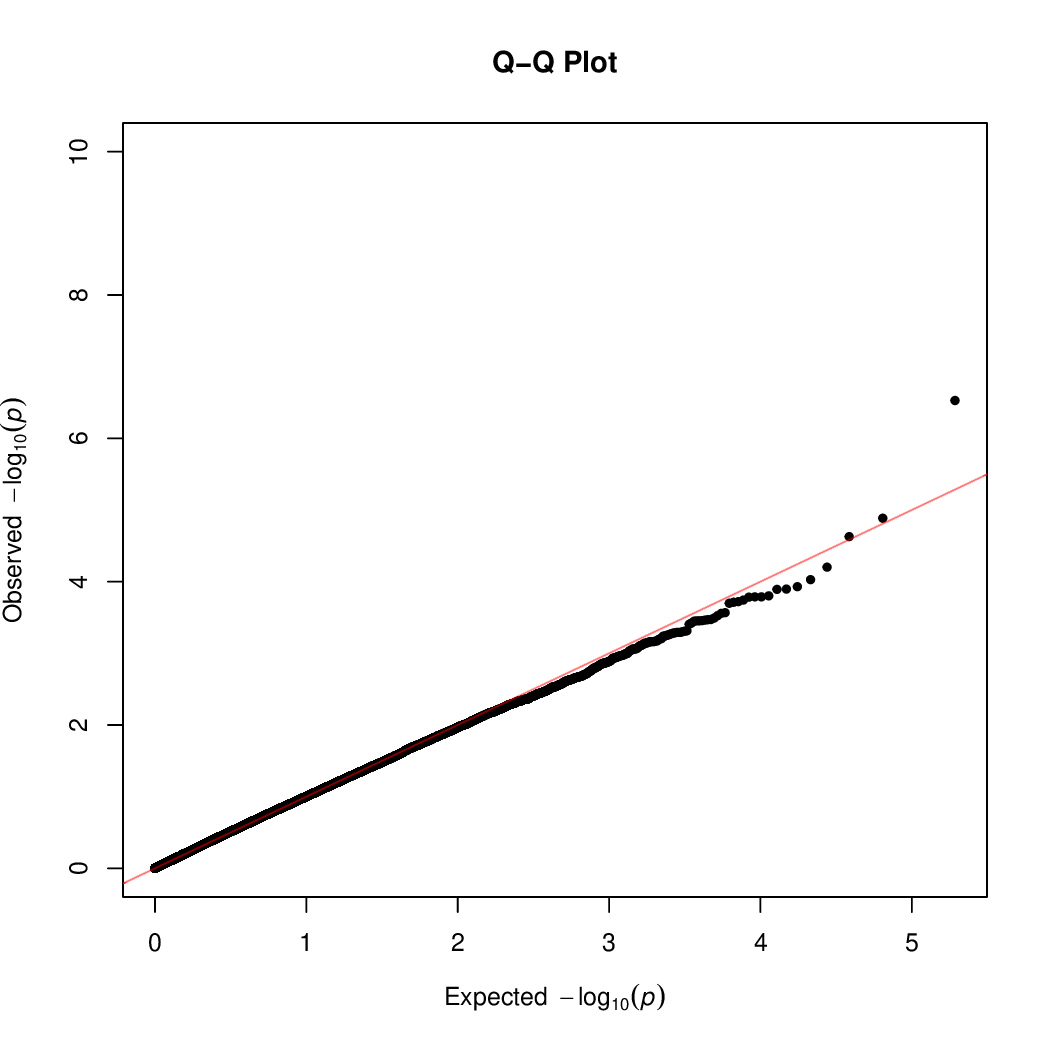

In [18]:
%preview -n assoc_adj_final.qq.pdf -s png

> assoc_adj_final.manhattan.pdf (4.6 MiB):

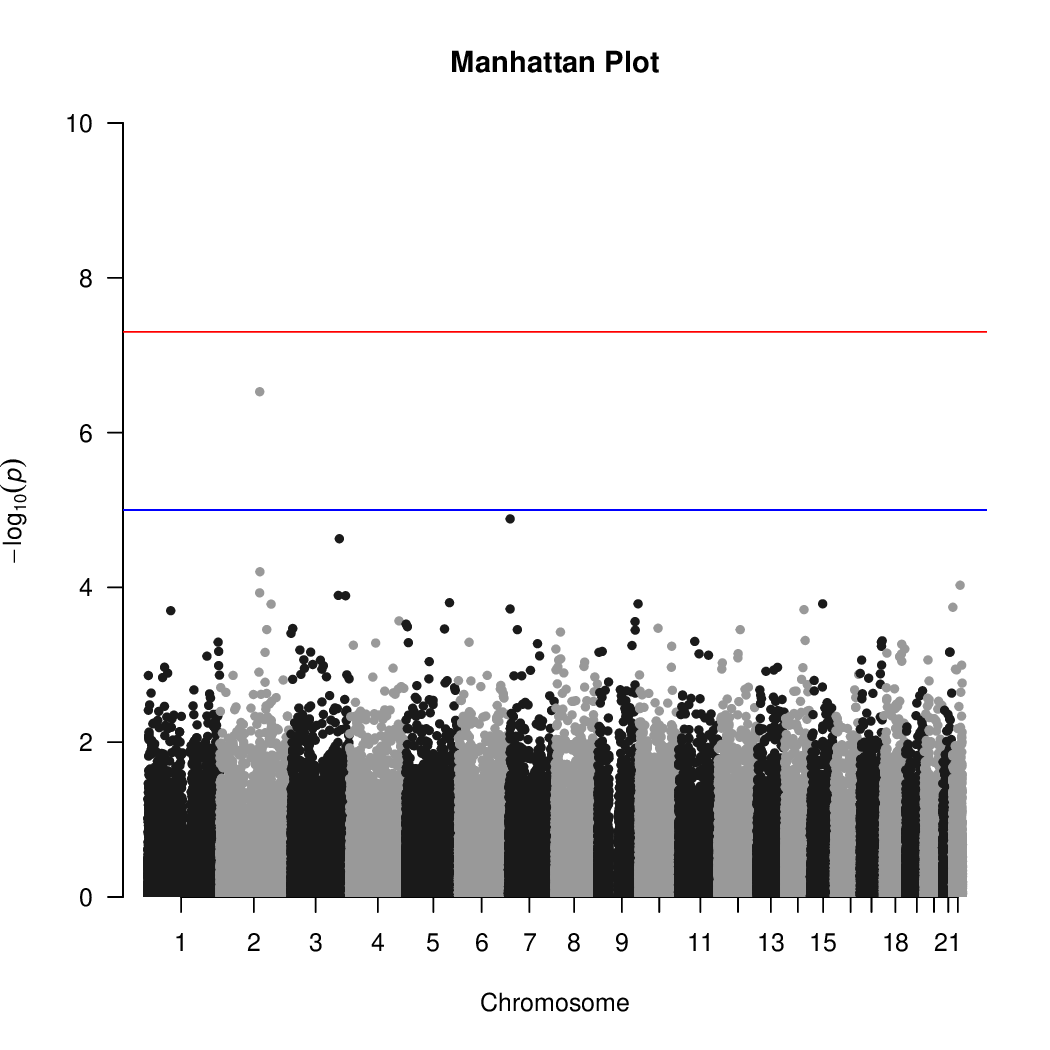

In [19]:
%preview -n assoc_adj_final.manhattan.pdf -s png